####2. Twitter Sentiment Analysis Using Long Short-Term Memory Networks (LSTM) Methods

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
# File loading
columns = ["sentiment", "id", "date", "query", "user", "text"]
df  = pd.read_csv('/content/drive/My Drive/SA.csv',header=None, names=columns, encoding="ISO-8859-1")

In [ ]:
# Drop unnecessary columns
df.drop(["id", "date", "query", "user"], axis=1, inplace=True)
# Convert sentiment labels to 0 (negative) or 1 (positive)
df["sentiment"] = df["sentiment"].replace({0: 0, 4: 1})


In [ ]:
# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df["text"], df["sentiment"], test_size=0.2, random_state=42)

In [ ]:
# Tokenization and Padding
max_words = 10000
max_len = 100
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

In [ ]:
# Model Definition
embedding_dim = 100
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=max_len))
model.add(LSTM(128))
model.add(Dense(1, activation="sigmoid"))

In [ ]:
# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
# Train the model
history= model.fit(X_train_pad, y_train, epochs=3, batch_size=128, validation_split=0.1)


Epoch 1/3
5899/5899 [==============================] - 2534s 429ms/step - loss: 0.3453 - accuracy: 0.8522 - val_loss: 0.3222 - val_accuracy: 0.8626
Epoch 2/3
5899/5899 [==============================] - 2584s 438ms/step - loss: 0.3093 - accuracy: 0.8683 - val_loss: 0.3161 - val_accuracy: 0.8660
Epoch 3/3
5899/5899 [==============================] - 2708s 459ms/step - loss: 0.2915 - accuracy: 0.8768 - val_loss: 0.3160 - val_accuracy: 0.8674


In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test_pad, y_test)
print("Test Accuracy:", accuracy)

6554/6554 [==============================] - 428s 65ms/step - loss: 0.3159 - accuracy: 0.8665
Test Accuracy: 0.8665338158607483


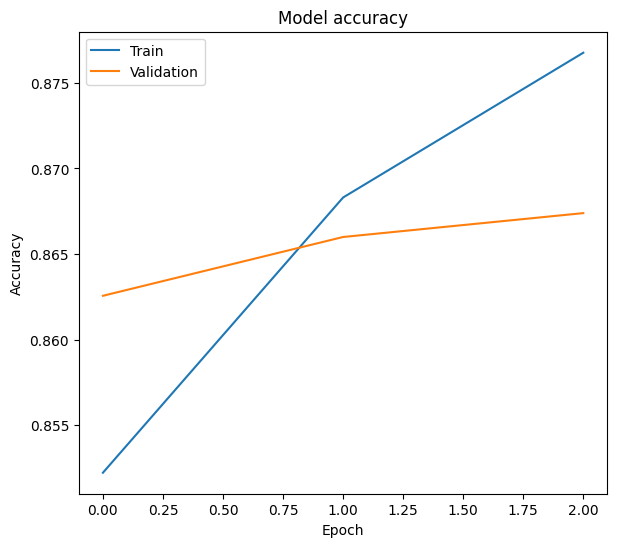

In [ ]:
# Plot training & validation accuracy values
# Plot training history
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

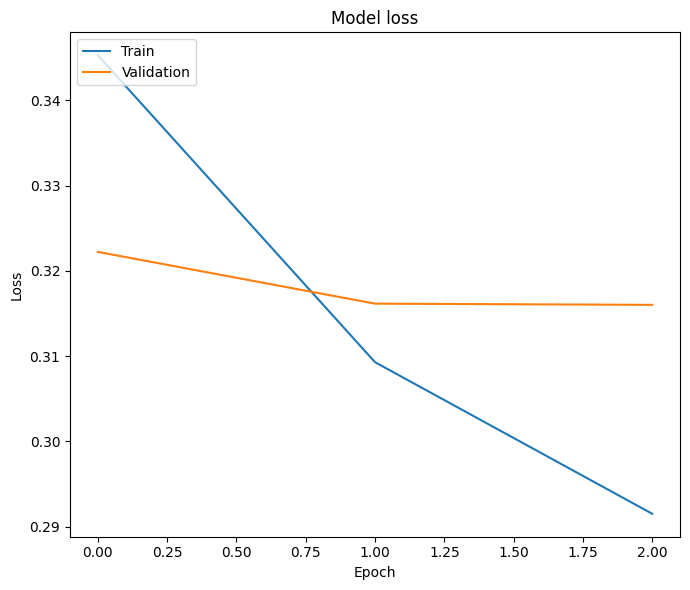

In [ ]:
# Plot training & validation loss values
plt.figure(figsize=(7, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
# Evaluate the model on training data
train_loss, train_accuracy = model.evaluate(X_train_pad, y_train)
print("Training Accuracy:", train_accuracy)

# Evaluate the model on testing data
test_loss, test_accuracy = model.evaluate(X_test_pad, y_test)
print("Testing Accuracy:", test_accuracy)

26215/26215 [==============================] - 1752s 67ms/step - loss: 0.2714 - accuracy: 0.8866
Training Accuracy: 0.8866342306137085
6554/6554 [==============================] - 423s 65ms/step - loss: 0.3159 - accuracy: 0.8665
Testing Accuracy: 0.8665338158607483


6554/6554 [==============================] - 420s 64ms/step


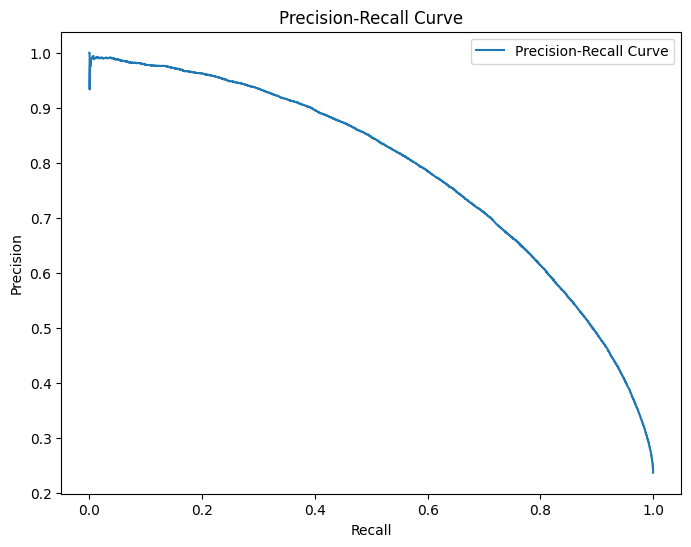

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc
# Plot precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, model.predict(X_test_pad))
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


In [ ]:
# Misclassified Samples
misclassified_indices = np.where(y_test != y_pred)[0]
for idx in misclassified_indices[:5]:
    print("True Label:", y_test.iloc[idx], "Predicted Label:", y_pred[idx], "Text:", X_test.iloc[idx])

True Label: 1 Predicted Label: 0 Text: @mynameismo Good Morning - here's hoping it's a good one for ya! 
True Label: 1 Predicted Label: 0 Text: doing my makeup and stuffs.  gonna be a good day !! 
True Label: 1 Predicted Label: 0 Text: Planted peas, basil, cat nip and parsley on the fire escape! Lettuce and beans to come. Oscar is excited/confused. 
True Label: 1 Predicted Label: 0 Text: @vthorne well if ur only drinking water, its no surprise ur not drunk, silly! 
True Label: 1 Predicted Label: 0 Text: i'm on msn! and aim, so let's chat ^^ send me your screenames/msns 


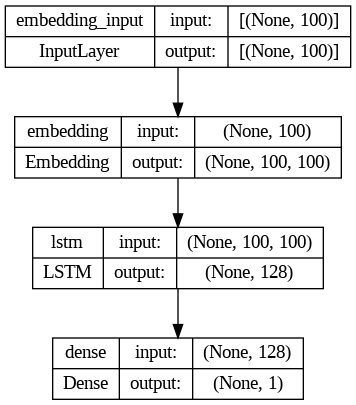

In [ ]:
# Model Architecture
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)